# Avaliação de Desempenho do Protocolo TCP em condições de congestionamento: cubic x reno

## Alunos

<a href="https://github.com/lucascraupp">
    <img style="border-radius: 50%;" src="https://avatars.githubusercontent.com/u/86060864?v=4" width="100px;" alt=""/><br />
    <sub><b>Lucas Coelho Raupp</b></sub></a><br />

&nbsp;

<a href="https://github.com/ArthurAnastopulos">
    <img style="border-radius: 50%;" src="https://avatars.githubusercontent.com/u/51097061?v=4" width="100px;" alt=""/><br />
    <sub><b>Arthur Anastopulos dos Santos</b></sub></a><br />

## Objetivo

Projetar um experimento para avaliar o comportamento de dois algoritmos de controle de congestionamento (cubic e reno) em uma dada topologia.


## Métricas

Taxa de transmissão média.

## Parâmetros fixados

- Tráfego de background UDP
- Cenário com fluxo TCP
- Links ethernet de 1Gbps.
- Intervalos de confiança de 99%

## Fatores e níveis

- Algorítmo de congestionamento
  - Cubic
  - Reno
- BER
  - 1/1e5
  - 1/1e6
- Retardo no link entre roteadores
  - 10ms
  - 100ms

## Técnicas usadas para avaliação

Simulações realizadas através dos softwares Imunes e IPERF

***

## Amostra dos dados obtidos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/dados.csv")

data.head()

,Repetição,Protocolo,BER,Delay,Largura de Banda UDP,Timestamp,IP PC1,Porta PC1,IP PC2,Porta PC2,ID,Intervalo,Taxa de Transferência,Largura de Banda TCP
0,0,cubic,100000,10000,10M,20240318150617,10.0.0.20,35142,10.0.1.20,5001,3,0.0-10.5,786432,598366
1,0,cubic,100000,100000,10M,20240318150630,10.0.0.20,51460,10.0.1.20,5001,3,0.0-11.8,917504,621544
2,0,cubic,1000000,10000,10M,20240318150644,10.0.0.20,37122,10.0.1.20,5001,3,0.0-13.9,1179648,677528
3,0,cubic,1000000,100000,10M,20240318150656,10.0.0.20,40512,10.0.1.20,5001,3,0.0-11.9,786432,528411
4,0,reno,100000,10000,10M,20240318150709,10.0.0.20,51480,10.0.1.20,5001,3,0.0-12.3,786432,509476


## Plotagem dos gráficos

Limites do intervalo de confiança para o protocolo cubic: 0.595e6 - 1.63e6
Limites do intervalo de confiança para o protocolo reno: 0.393e6 - 1.64e6


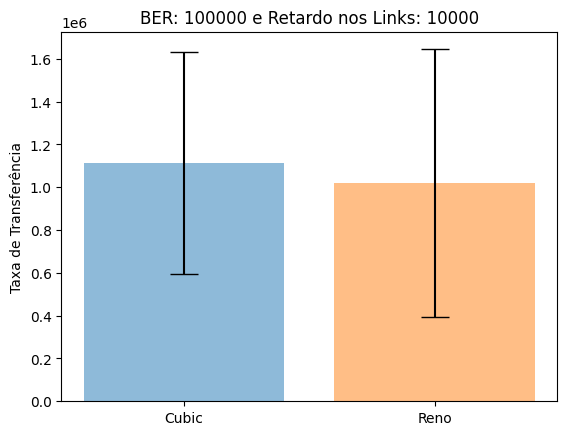

Limites do intervalo de confiança para o protocolo cubic: 0.88e6 - 1.18e6
Limites do intervalo de confiança para o protocolo reno: 0.414e6 - 1.95e6


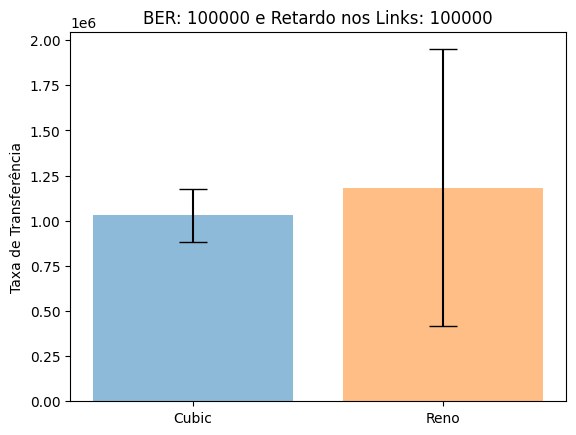

Limites do intervalo de confiança para o protocolo cubic: 0.622e6 - 2.92e6
Limites do intervalo de confiança para o protocolo reno: 0.69e6 - 2.17e6


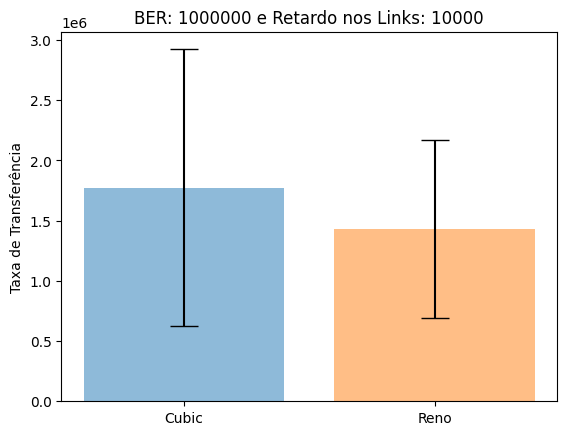

Limites do intervalo de confiança para o protocolo cubic: 0.698e6 - 1.44e6
Limites do intervalo de confiança para o protocolo reno: 0.658e6 - 1.75e6


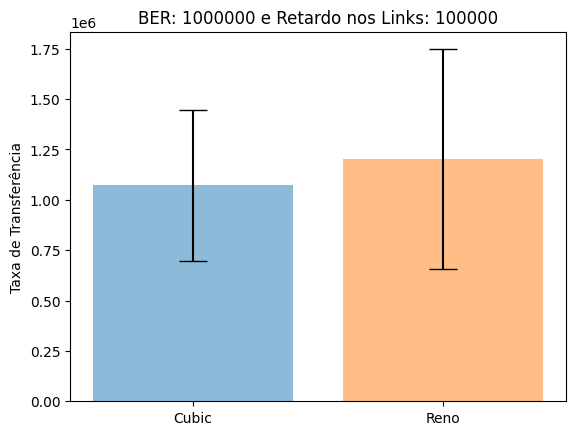

In [3]:
def get_interval(data: pd.DataFrame, protocol: str):
    """ P(-z < Z < z)
    μ - t * (σ / √n) < Z < μ + t * (σ / √n)
    """

    mean = data.mean()
    standard_deviation = data.std()
    n = data.count()
    t = 3.355 # 99% de confiança (tabela t-student)

    confidence_interval = t * (standard_deviation/np.sqrt(n))

    inferior_limit = mean - confidence_interval
    superior_limit = mean + confidence_interval

    absolute_inferior = inferior_limit.iloc[0]/1e6
    absolute_superior = superior_limit.iloc[0]/1e6

    print(f"Limites do intervalo de confiança para o protocolo {protocol}: {absolute_inferior:.3}e6 - {absolute_superior:.3}e6")

    return confidence_interval

for ber in data["BER"].unique():
    for delay in data["Delay"].unique():
        data_cubic = data[(data["BER"] == ber) & (data["Delay"] == delay) & (data["Protocolo"] == "cubic")]
        data_cubic = pd.DataFrame(data_cubic["Taxa de Transferência"])
        data_reno = data[(data["BER"] == ber) & (data["Delay"] == delay) & (data["Protocolo"] == "reno")]
        data_reno = pd.DataFrame(data_reno["Taxa de Transferência"])

        confidence_interval_cubic = get_interval(data_cubic, "cubic")
        confidence_interval_reno = get_interval(data_reno, "reno")

        plt.bar("Cubic", data_cubic.mean(), yerr=confidence_interval_cubic, align='center', alpha=0.5, capsize=10)
        plt.bar("Reno", data_reno.mean(), yerr=confidence_interval_reno, align='center', alpha=0.5, capsize=10)

        plt.title(f"BER: {ber} e Retardo nos Links: {delay}")
        plt.ylabel("Taxa de Transferência")
        plt.show()

***

## Análise dos resultados

### Tabela Cubic x Reno

|   Cubic (Mbps) |   Reno (Mbps) |
|:--------------:|:-------------:|
|           1.11 |          1.02 |
|           1.03 |          1.18 |
|           1.77 |          1.43 |
|           1.07 |          1.20 |

### Conclusões

A simulação que apresentou a melhor taxa de transmissão foi a representada pelo terceiro gráfico. Com os seguintes dados:
- Protocolo: Cubic
- BER: 1/1e6
- Retardo nos links: 10 ms
- Taxa média de transmissão: 1,77 Mbps

A simulação que apresentou a pior taxa de transmissão foi a representada pelo primeiro gráfico. Com os seguintes dados:
- Protocolo: Reno
- BER : 1/e5
- Retardo nos links: 10 ms
- Taxa média de transmissão: 1.02 Mbps